In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
# Total 60000 images

In [3]:
x_train.shape
# 50000 samples
# Each image(matrix) 32*32
# and 3 is for rgb

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
x_train[0]
# First image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
obj = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def printimg(x,y,i):
  plt.figure(figsize=(15,2))
  plt.imshow(x[i])
  plt.xlabel(obj[y[i][0]])

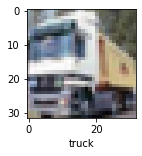

In [9]:
printimg(x_train,y_train,1)
# Second image is of a truck

In [10]:
# Normalising our data
# Dividing by 255

x_train = x_train/255
x_test = x_test/255

In [11]:
# First using ANN

clf = models.Sequential()

clf.add(layers.Flatten(input_shape=(32,32,3)))
clf.add(layers.Dense(units=20,kernel_initializer='he_uniform',activation='relu'))
clf.add(layers.Dense(units=25,kernel_initializer='he_uniform',activation='relu'))
clf.add(layers.Dense(units=10,kernel_initializer='glorot_uniform',activation='sigmoid'))

clf.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# sparse_categorical and not normal categorical because the y_train and y_test is not one hot encoded it direct gives value 0-9

clf.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0236 - accuracy: 0.2450
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8465 - accuracy: 0.3348
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7863 - accuracy: 0.3599
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7446 - accuracy: 0.3755
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7107 - accuracy: 0.3895


In [12]:
clf.evaluate(x_test,y_test)
# Performs really bad
# Just gives an accuracy of 35.51%

313/313 [==============================] - 1s 3ms/step - loss: 1.7536 - accuracy: 0.3690


[1.7535589933395386, 0.36899998784065247]

In [13]:
clf.predict(x_test)[0]
# First prediction 
# Arg max has to be used

array([0.21492976, 0.29013696, 0.36836848, 0.7895039 , 0.17373621,
       0.73660535, 0.5699242 , 0.17882095, 0.4031305 , 0.25957254],
      dtype=float32)

In [14]:
np.argmax(clf.predict(x_test)[0])

3

In [15]:
y_p = clf.predict(x_test)
y_pred = [np.argmax(i) for i in y_p]

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.56      0.47      1000
           1       0.57      0.36      0.44      1000
           2       0.29      0.21      0.25      1000
           3       0.25      0.33      0.28      1000
           4       0.41      0.17      0.24      1000
           5       0.38      0.32      0.35      1000
           6       0.28      0.71      0.41      1000
           7       0.57      0.24      0.34      1000
           8       0.65      0.24      0.35      1000
           9       0.39      0.54      0.45      1000

    accuracy                           0.37     10000
   macro avg       0.42      0.37      0.36     10000
weighted avg       0.42      0.37      0.36     10000



In [17]:
# Now lets create our model using CNN

cnn = models.Sequential()

cnn.add(layers.Conv2D(filters=40, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(layers.Conv2D(filters=60, kernel_size=(3,3), activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=30,activation='relu'))
cnn.add(layers.Dense(units=15,activation='softmax'))

cnn.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6044 - accuracy: 0.4260
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2183 - accuracy: 0.5693
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0696 - accuracy: 0.6259
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9790 - accuracy: 0.6593
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9197 - accuracy: 0.6814
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8683 - accuracy: 0.6989
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8258 - accuracy: 0.7133
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7899 - accuracy: 0.7260
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7622 - accuracy: 0.7368
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [18]:
cnn.evaluate(x_test,y_test)
# A much better of accuracy of close to 70 percent

313/313 [==============================] - 2s 5ms/step - loss: 0.9164 - accuracy: 0.6891


[0.9163951873779297, 0.6891000270843506]

In [19]:
y_p1 = cnn.predict(x_test)
y_pred1 = [np.argmax(i) for i in y_p1]

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.83      0.80      0.81      1000
           2       0.54      0.61      0.57      1000
           3       0.54      0.48      0.51      1000
           4       0.67      0.60      0.64      1000
           5       0.67      0.55      0.61      1000
           6       0.67      0.84      0.74      1000
           7       0.79      0.70      0.75      1000
           8       0.71      0.86      0.77      1000
           9       0.83      0.70      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

